In [32]:
import pandas as pd
from facebook_scraper import get_posts
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
import numpy as np

In [46]:
##使用 facebook_scraper 先抓取10頁
post_info_list = [ x for x in get_posts(group=420010235094307,pages=12)]
result_df = json_normalize(post_info_list)

In [47]:
result_df['cat']  = result_df['text'].apply(lambda x : '貓' in x)
result_df['dog']  = result_df['text'].apply(lambda x : '狗' in x or '犬' in x)

In [48]:
result_df['date'] = result_df['time'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [49]:
cat_count = result_df.query('cat == True').groupby('date')['cat'].count().reset_index()
dog_count = result_df.query('dog == True').groupby('date')['dog'].count().reset_index()
result_count_df = pd.merge(cat_count,dog_count,on = 'date',how = 'outer').fillna(0)

In [50]:
result_count_df.sort_values('date')

,date,cat,dog
8,2019-03-04,0.0,1.0
9,2020-03-10,0.0,1.0
0,2020-07-15,1.0,0.0
10,2020-11-05,0.0,1.0
1,2020-11-07,1.0,0.0
2,2020-11-08,1.0,0.0
3,2020-11-10,4.0,2.0
4,2020-11-11,3.0,2.0
5,2020-11-12,9.0,20.0
6,2020-11-13,16.0,26.0


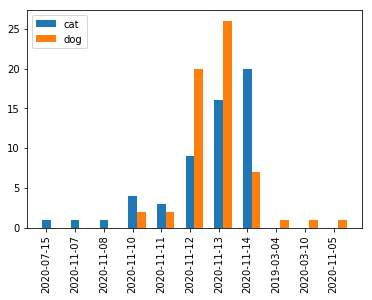

In [51]:
legend = ['cat','dog']
width =0.3
plt.bar(np.arange(result_count_df.shape[0]), result_count_df['cat'], width=width)
plt.bar(np.arange(result_count_df.shape[0])+ width, result_count_df['dog'], width=width)
labels = result_count_df['date'].tolist()
plt.xticks(np.arange(result_count_df.shape[0]),labels, rotation='vertical')
plt.legend(legend,loc=2)
plt.show()